### Importing Necessary Libraries
#### %matplotlib inline : used to give the output of plotting commands is displayed inline within frontends like the Jupyter notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn as sk
from sklearn.metrics import classification_report

In [58]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [57]:
pip install xgboost

#### Read the Dataset of IPL 

In [2]:
data=pd.read_csv("E:/Dataset/IPL/matches.csv")
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


#### Count of Rows and Columns

In [3]:
data.shape

(636, 18)

In [4]:
data.info

<bound method DataFrame.info of       id  season       city        date                        team1  \
0      1    2017  Hyderabad  05-04-2017          Sunrisers Hyderabad   
1      2    2017       Pune  06-04-2017               Mumbai Indians   
2      3    2017     Rajkot  07-04-2017                Gujarat Lions   
3      4    2017     Indore  08-04-2017       Rising Pune Supergiant   
4      5    2017  Bangalore  08-04-2017  Royal Challengers Bangalore   
..   ...     ...        ...         ...                          ...   
631  632    2016     Raipur  22-05-2016             Delhi Daredevils   
632  633    2016  Bangalore  24-05-2016                Gujarat Lions   
633  634    2016      Delhi  25-05-2016          Sunrisers Hyderabad   
634  635    2016      Delhi  27-05-2016                Gujarat Lions   
635  636    2016  Bangalore  29-05-2016          Sunrisers Hyderabad   

                           team2                  toss_winner toss_decision  \
0    Royal Challengers B

#### Name of all the Columns

In [5]:
data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

### Data Preprocesing
##### Finding NaN values
##### False represents that the data is correct
##### True means data is Not correct or has NaN values

In [6]:
data.isna().any()

id                 False
season             False
city                True
date               False
team1              False
team2              False
toss_winner        False
toss_decision      False
result             False
dl_applied         False
winner              True
win_by_runs        False
win_by_wickets     False
player_of_match     True
venue              False
umpire1             True
umpire2             True
umpire3             True
dtype: bool

In [7]:
data.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

#### Stastical Description of Data

In [8]:
data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


### Data Cleaning

#### Dropping NaN Columns from Dataframe

In [3]:
data.dropna(axis=1,how='all',inplace=True)
data

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,22-05-2016,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford
632,633,2016,Bangalore,24-05-2016,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena
633,634,2016,Delhi,25-05-2016,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin
634,635,2016,Delhi,27-05-2016,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan


In [4]:
data.isna().any()

id                 False
season             False
city                True
date               False
team1              False
team2              False
toss_winner        False
toss_decision      False
result             False
dl_applied         False
winner              True
win_by_runs        False
win_by_wickets     False
player_of_match     True
venue              False
umpire1             True
umpire2             True
dtype: bool

In [5]:
data.isna().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             3
win_by_runs        0
win_by_wickets     0
player_of_match    3
venue              0
umpire1            1
umpire2            1
dtype: int64

#### Replacing of umpire1 and umpire2's NaN rows with ffill values

In [6]:
data.umpire1.fillna(method='ffill',inplace=True)
data.umpire2.fillna(method='ffill',inplace=True)

#### Removing records having null values in "winner" column

In [7]:
data=data[data["winner"].notna()]

### Removing records having null values in "city" column

In [8]:
data=data[data["city"].notna()]

### Final Check of NaN values

In [9]:
data.isna().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

#### No. of matches played according the Data given

In [10]:
data['id'].count()

626

#### No. of seasons played in IPL as per to dataset

In [11]:
data['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

#### Which IPL team team won by scoring the maximum runs?

In [12]:
data.iloc[data['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     06-05-2017
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
Name: 43, dtype: object

#### Team which took maximum wickets in IPL

In [13]:
data.iloc[data['win_by_wickets'].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           07-04-2017
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
Name: 2, dtype

#### Team which took minimum wickets in IPL

In [14]:
data.iloc[data['win_by_wickets'].idxmin()]

id                                                         1
season                                                  2017
city                                               Hyderabad
date                                              05-04-2017
team1                                    Sunrisers Hyderabad
team2                            Royal Challengers Bangalore
toss_winner                      Royal Challengers Bangalore
toss_decision                                          field
result                                                normal
dl_applied                                                 0
winner                                   Sunrisers Hyderabad
win_by_runs                                               35
win_by_wickets                                             0
player_of_match                                 Yuvraj Singh
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                          AY Dandekar
umpire2                 

#### Season in which highest number of matches were ever played

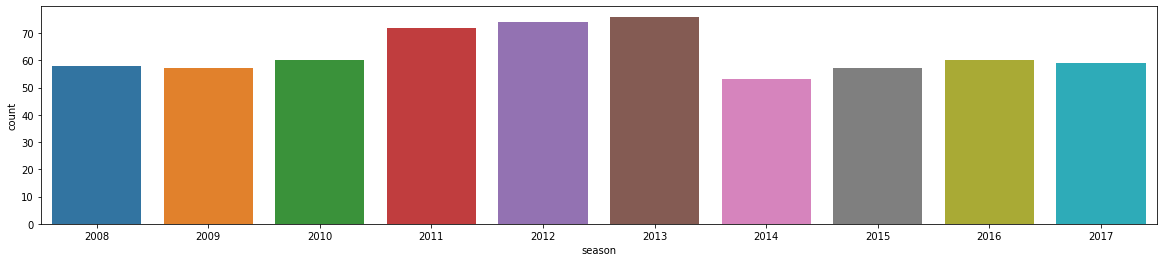

In [15]:
fig_dim=(20,4)
fig,ax=plt.subplots(figsize=fig_dim)
sns.countplot(x='season',ax=ax,data=data)
plt.show()

#### Most Succesful IPL team 

<AxesSubplot:xlabel='winner'>

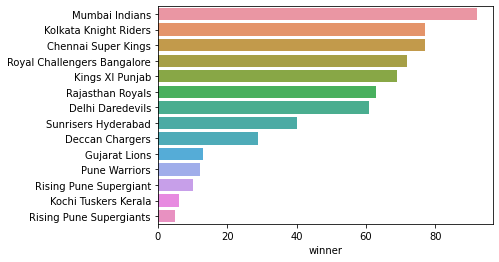

In [16]:
data1=data.winner.value_counts()
sns.barplot(y=data1.index,x=data1)

### Probability of Winning a match if the toss was won.

In [17]:
probability_of_win = data['toss_winner'] == data['winner']
probability_of_win.groupby(probability_of_win).size()

False    304
True     322
dtype: int64

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

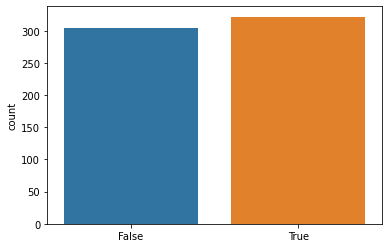

In [18]:
 sns.countplot(probability_of_win)

### Highest wins by teams per season

In [19]:
data.groupby('season')['winner'].value_counts()

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2017    Sunrisers Hyderabad             8
        Kings XI Punjab                 7
        Delhi Daredevils                6
        Gujarat Lions                   4
        Royal Challengers Bangalore     3
Name: winner, Length: 84, dtype: int64

#### Toss Decisions

In [20]:
data['toss_decision'].value_counts()

field    357
bat      269
Name: toss_decision, dtype: int64

### Man of the Match
Highest to Lowest

In [21]:
data['player_of_match'].value_counts()

CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
SK Raina          14
                  ..
LR Shukla          1
R Bhatia           1
A Singh            1
SB Jakati          1
BCJ Cutting        1
Name: player_of_match, Length: 201, dtype: int64

### Maximum number of matches played

In [22]:
data['city'].value_counts()

Mumbai            85
Bangalore         64
Kolkata           61
Delhi             59
Hyderabad         49
Chennai           48
Chandigarh        46
Jaipur            33
Pune              32
Durban            15
Ahmedabad         12
Centurion         12
Visakhapatnam     11
Rajkot            10
Dharamsala         9
Johannesburg       8
Cape Town          7
Abu Dhabi          7
Ranchi             7
Port Elizabeth     7
Cuttack            7
Raipur             6
Sharjah            6
Kochi              5
Indore             5
Kanpur             4
Nagpur             3
Kimberley          3
East London        3
Bloemfontein       2
Name: city, dtype: int64

<AxesSubplot:>

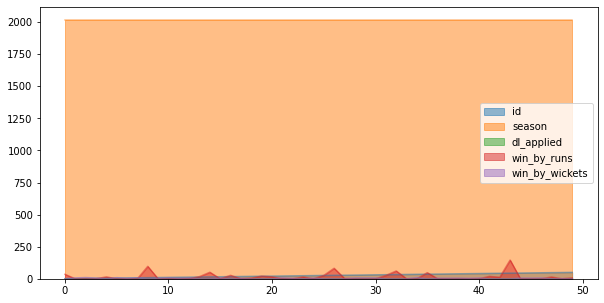

In [28]:
data[['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1',
      'umpire2']][:50].plot(kind = 'area', figsize = (10,5), stacked = False)

### Feature Engineering

#### Encoding Categorical Variables:
The columns taken into consideration are: team_1, team_2, toss_winner, toss_decision, venue, city and winner.

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
	encoder= LabelEncoder()
	data["team1"]=encoder.fit_transform(data["team1"])
	data["team2"]=encoder.fit_transform(data["team2"])
	data["winner"]=encoder.fit_transform(data["winner"].astype(str))
	data["toss_winner"]=encoder.fit_transform(data["toss_winner"])
	data["venue"]=encoder.fit_transform(data["venue"])

### The values in toss_winner and winner include team names, but what is the relation of these variables with team_1 or team_2? The only thing common between them is that they would share the same value, but that is not enough to be logical. Also, toss_decision might be bat or field, but what team are they referring to? To tackle this problem, we will add new columns team1_win, team1_toss_win, and team1_bat for columns winner, toss_winner, and toss_decision such that they reflect the relationship with column team_1.

#### outcome variable team1_win as a probability of team1 winning the match

In [25]:
data.loc[data["winner"]==data["team1"],"team1_win"]=1
data.loc[data["winner"]!=data["team1"],"team1_win"]=0

#### outcome variable team1_win as a probability of team1 winning the match

In [26]:
data.loc[data["winner"]==data["team1"],"team1_win"]=1
data.loc[data["winner"]!=data["team1"],"team1_win"]=0 

#### outcome variable team1_toss_win as a value of team1 winning the toss

In [27]:
data.loc[data["toss_winner"]==data["team1"],"team1_toss_win"]=1
data.loc[data["toss_winner"]!=data["team1"],"team1_toss_win"]=0 

#### outcome variable team1_bat to depict if team1 bats first

In [28]:
data["team1_bat"]=0
data.loc[(data["team1_toss_win"]==1) & (data["toss_decision"]=="bat"),"team1_bat"]=1

### Feature Selection

#### We will check the columns if any of them represent the same values as other columns. For this, we need to create a correlation matrix to find out the relationships between the column. If the absolute value of the correlation between the columns is high enough, we can say that they represent similar values.

#### Dataframe of related features

In [29]:
prediction_df=data[["team1","team2","team1_toss_win","team1_bat","team1_win","venue"]]

#### finding the higly correlated features

In [30]:
	correlated_features = set()
	correlation_matrix = prediction_df.drop('team1_win', axis=1).corr()
	
	for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > 0.9:
                column = correlation_matrix.columns[i]
                correlated_features.add(column)
	
	prediction_df.drop(columns=correlated_features)

,team1,team2,team1_toss_win,team1_win,venue
0,13,12,0.0,1.0,22
1,7,10,0.0,0.0,15
2,3,6,0.0,0.0,24
3,10,4,0.0,0.0,10
4,12,2,1.0,1.0,13
...,...,...,...,...,...
631,2,12,0.0,0.0,26
632,3,12,0.0,0.0,13
633,13,6,0.0,1.0,7
634,3,13,0.0,0.0,7


### Building, Training & Testing the Model

#### Once we build the model, we need to validate that model using values that are never exposed to the model. Hence we split our data using train_test_split, a class provided by Scikit-learn into 2 parts having a distribution of 80–20. The model is trained on 80% of data and validated against the other 20% of the data.

### Splitting the data into training and testing data and scaling it

In [31]:
data.replace({"Mumbai Indians":"MI", "Delhi Capitals":"DC", 
               "Sunrisers Hyderabad":"SRH", "Rajasthan Royals":"RR", 
               "Kolkata Knight Riders":"KKR", "Kings XI Punjab":"KXIP", 
               "Chennai Super Kings":"CSK", "Royal Challengers Bangalore":"RCB",
              "Kochi Tuskers Kerala":"KTK", "Rising Pune Supergiants":"RPS",
              "Gujarat Lions":"GL", "Pune Warriors":"PW"}, inplace=True)


encode = {'team1': {'KKR':1,'CSK':2,'RR':3,'MI':4,'SRH':5,'KXIP':6,'RCB':7,'DC':8,'KTK':9,'RPS':10,'GL':11,'PW':12},
         'team2': {'KKR':1,'CSK':2,'RR':3,'MI':4,'SRH':5,'KXIP':6,'RCB':7,'DC':8,'KTK':9,'RPS':10,'GL':11,'PW':12},
         'toss_winner': {'KKR':1,'CSK':2,'RR':3,'MI':4,'SRH':5,'KXIP':6,'RCB':7,'DC':8,'KTK':9,'RPS':10,'GL':11,'PW':12},
          'winner': {'KKR':1,'CSK':2,'RR':3,'MI':4,'SRH':5,'KXIP':6,'RCB':7,'DC':8,'KTK':9,'RPS':10,'GL':11,'PW':12,'Draw':13}}
data.replace(encode, inplace=True)
data.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,team1_win,team1_toss_win,team1_bat
0,1,2017,Hyderabad,05-04-2017,13,12,12,field,normal,0,13,35,0,Yuvraj Singh,22,AY Dandekar,NJ Llong,1.0,0.0,0
1,2,2017,Pune,06-04-2017,7,10,10,field,normal,0,10,0,7,SPD Smith,15,A Nand Kishore,S Ravi,0.0,0.0,0
2,3,2017,Rajkot,07-04-2017,3,6,6,field,normal,0,6,0,10,CA Lynn,24,Nitin Menon,CK Nandan,0.0,0.0,0
3,4,2017,Indore,08-04-2017,10,4,4,field,normal,0,4,0,6,GJ Maxwell,10,AK Chaudhary,C Shamshuddin,0.0,0.0,0
4,5,2017,Bangalore,08-04-2017,12,2,12,bat,normal,0,12,15,0,KM Jadhav,13,AK Chaudhary,C Shamshuddin,1.0,1.0,1


In [32]:
dicVal = encode['winner']
train = data[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
train.head(5)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,13,12,Hyderabad,field,12,22,13
1,7,10,Pune,field,10,15,10
2,3,6,Rajkot,field,6,24,6
3,10,4,Indore,field,4,10,4
4,12,2,Bangalore,bat,12,13,12


In [33]:
df = pd.DataFrame(train)
var_mod = ['city','toss_decision','venue']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes

team1            int32
team2            int32
city             int32
toss_decision    int32
toss_winner      int32
venue            int64
winner           int32
dtype: object

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
X = StandardScaler().fit_transform(X)

In [37]:
X = df[['team1', 'team2', 'venue']]
y = df[['winner']]
sc = StandardScaler()
X = sc.fit_transform(X)

In [39]:
logistic_model = LogisticRegression()
logistic_model.fit(X,y)
print("Logistic Regression accuracy: ",(logistic_model.score(X,y))*100)
Random_model = RandomForestClassifier()
Random_model.fit(X,y)
print("Random Forest accuracy: ", (Random_model.score(X,y))*100)
xgb_model = XGBClassifier(n_estimators=390, learning_rate=0.1)
xgb_model.fit(X,y)
print("XGB accuracy: ", (xgb_model.score(X,y))*100)
knn_model = KNeighborsClassifier()
knn_model.fit(X,y)
print("KNeighbor Classifier accuracy", (knn_model.score(X,y))*100)
NB_model = GaussianNB()
NB_model.fit(X,y)
print("Gaussion Navie Bayis accuracy: " ,(NB_model.score(X,y))*100)
decision_model = DecisionTreeClassifier()
decision_model.fit(X,y)
print("Decision Tree Classifier accuracy: ", (decision_model.score(X,y))*100)

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kashp\AppData\Local\Temp/ipykernel_19660/3636793044.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Random_model.fit(X,y)


Logistic Regression accuracy:  24.440894568690098
Random Forest accuracy:  85.3035143769968
XGB accuracy:  85.3035143769968
KNeighbor Classifier accuracy 63.73801916932907
Gaussion Navie Bayis accuracy:  37.85942492012779
Decision Tree Classifier accuracy:  85.3035143769968


E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
